Attribute Information

    Age: age of the patient [years]
    
    Sex: sex of the patient [M: Male, F: Female]
    
    ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
    
    RestingBP: resting blood pressure [mm Hg]
    
    Cholesterol: serum cholesterol [mm/dl]
    
    FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
    
    RestingECG:resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST      elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by  Estes' riteria]
    
    MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
    
    ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
    
    Oldpeak: oldpeak = ST [Numeric value measured in depression]
    
    ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
    
    HeartDisease: output class [1: heart disease, 0: Normal]


In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('heart.csv')

**Exploratory Data Analysis**

In [5]:
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [6]:
df.tail(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
908,63,M,ASY,140,187,0,LVH,144,Y,4.0,Up,1
909,63,F,ASY,124,197,0,Normal,136,Y,0.0,Flat,1
910,41,M,ATA,120,157,0,Normal,182,N,0.0,Up,0
911,59,M,ASY,164,176,1,LVH,90,N,1.0,Flat,1
912,57,F,ASY,140,241,0,Normal,123,Y,0.2,Flat,1
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [8]:
# Age
df['Age'].describe()

count    918.000000
mean      53.510893
std        9.432617
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: Age, dtype: float64

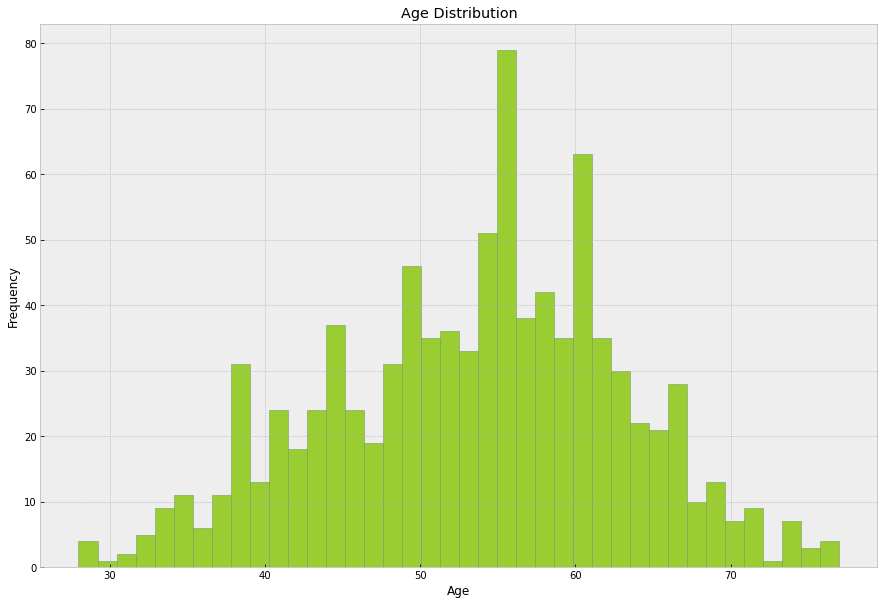

In [9]:
# Show age distribution
plt.style.use('bmh')
plt.figure(figsize=(15, 10))
plt.hist(df['Age'], bins=40, color='yellowgreen' , edgecolor="#6A9662")
plt.gca().set(title='Age Distribution', xlabel='Age', ylabel='Frequency')
plt.show()

In [10]:
# Sex
df['Sex'].value_counts()

M    725
F    193
Name: Sex, dtype: int64

In [11]:
# Encode Sex column 
from sklearn.preprocessing import LabelEncoder
LabelEncoderModel = LabelEncoder()
df['Sex'] = LabelEncoderModel.fit_transform(df['Sex'])

In [12]:
df['Sex'].value_counts()

1    725
0    193
Name: Sex, dtype: int64

In [13]:
# ChestPainType
ChestPainType = df['ChestPainType'].value_counts()
ChestPainType

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

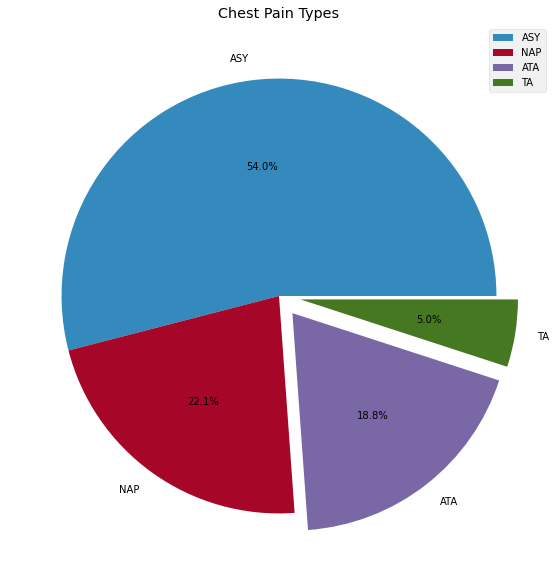

In [14]:
plt.figure(figsize=(15, 10))
plt.pie(ChestPainType, labels=['ASY', 'NAP', 'ATA', 'TA'],
                        autopct='%1.1f%%', shadow=False,
                        explode=[0.0, 0.0, 0.1, 0.1])
plt.title('Chest Pain Types')
plt.legend()
plt.show()

In [15]:
# Encode ChestPainType column
df['ChestPainType'] = LabelEncoderModel.fit_transform(df['ChestPainType'])

In [16]:
df['ChestPainType'].value_counts()

0    496
2    203
1    173
3     46
Name: ChestPainType, dtype: int64

In [17]:
# RestingBP
df['RestingBP'].describe()

count    918.000000
mean     132.396514
std       18.514154
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: RestingBP, dtype: float64

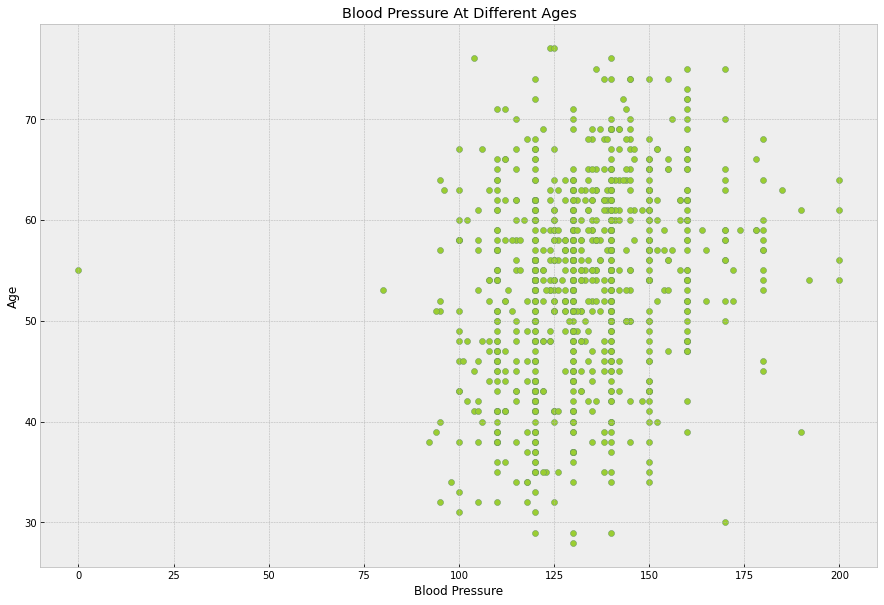

In [18]:
# Show Blood Pressure At Different Ages
plt.figure(figsize=(15, 10))
plt.scatter(df['RestingBP'], df['Age'], color='yellowgreen', edgecolor="#6A9662")
plt.title('Blood Pressure At Different Ages')
plt.xlabel('Blood Pressure')
plt.ylabel('Age')
plt.show()

In [19]:
# Observations which have 0
df[df['RestingBP'] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,1,2,0,0,0,Normal,155,N,1.5,Flat,1


In [20]:
# drop index number 449
df.drop(index=449, inplace=True)

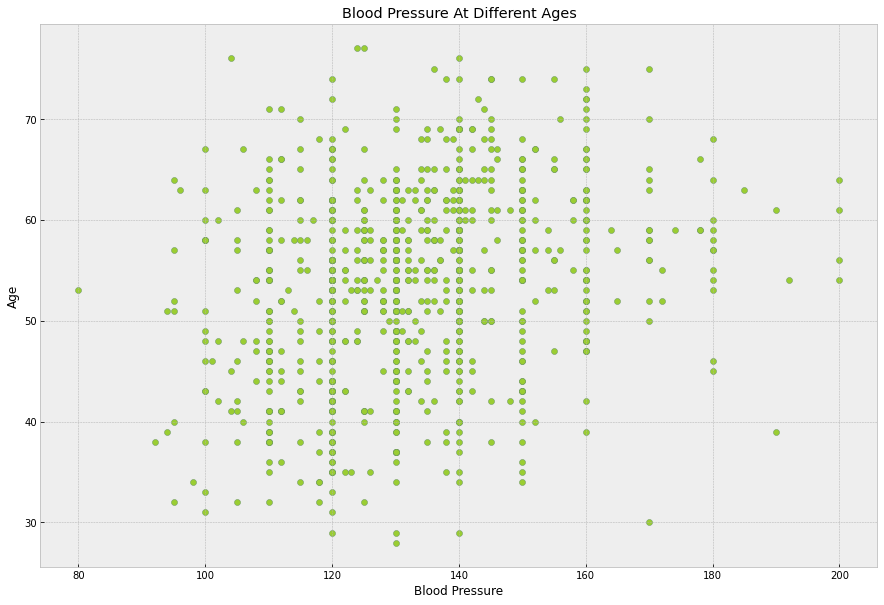

In [21]:
# Show Blood Pressure At Different Ages
plt.figure(figsize=(15, 10))
plt.scatter(df['RestingBP'], df['Age'], color='yellowgreen', edgecolor="#6A9662")
plt.title('Blood Pressure At Different Ages')
plt.xlabel('Blood Pressure')
plt.ylabel('Age')
plt.show()

In [22]:
# Cholesterol
# Cholesterol column is an object type, so we will convert it to int64 
df['Cholesterol'] = df['Cholesterol'].astype('int64')

In [23]:
df['Cholesterol'].describe()

count    917.000000
mean     199.016358
std      109.246330
min        0.000000
25%      174.000000
50%      223.000000
75%      267.000000
max      603.000000
Name: Cholesterol, dtype: float64

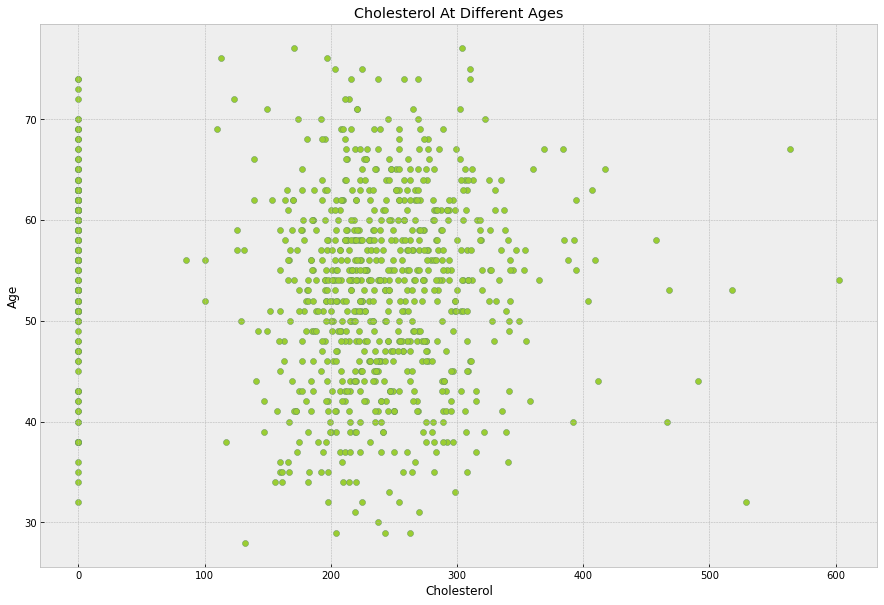

In [24]:
# Show Serum Cholesterol At Different Ages
plt.figure(figsize=(15, 10))
plt.scatter(df['Cholesterol'], df['Age'], color='yellowgreen', edgecolor="#6A9662")
plt.title('Cholesterol At Different Ages')
plt.xlabel('Cholesterol')
plt.ylabel('Age')
plt.show()

In [25]:
# Observations which have 0
df[df['Cholesterol'] == 0]['Cholesterol'].count()

171

In [26]:
# Drop observation which have 0
indexes = []
c = 0
for i in df['Cholesterol']:
    c = c+1
    if i == 0:
        indexes.append(c)

df.drop(labels=indexes, inplace=True)

In [27]:
df[df['Cholesterol'] == 0]['Cholesterol']

293    0
421    0
423    0
427    0
434    0
446    0
Name: Cholesterol, dtype: int64

In [28]:
list = [293, 421, 423, 427, 434, 446]
df.drop(labels=list, inplace=True)

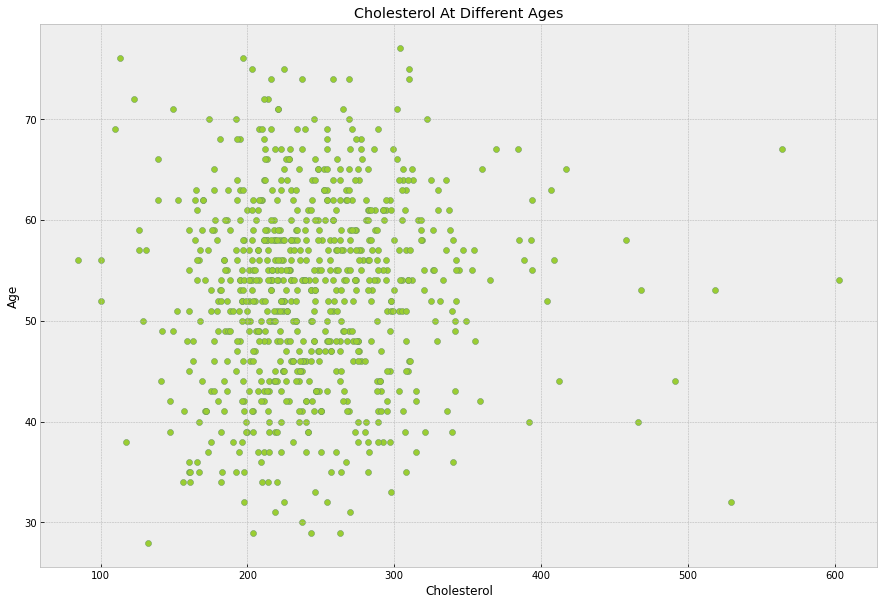

In [29]:
# Show Serum Cholesterol At Different Ages
plt.figure(figsize=(15, 10))
plt.scatter(df['Cholesterol'], df['Age'], color='yellowgreen', edgecolor="#6A9662")
plt.title('Cholesterol At Different Ages')
plt.xlabel('Cholesterol')
plt.ylabel('Age')
plt.show()

Sometimes the cholesterol value can reach 600, but in this case, you need immediate treatment.

In [30]:
# Observation which have cholestrol more value than 400
df[df['Cholesterol'] >= 400]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
28,53,0,1,113,468,0,Normal,127,N,0.0,Up,0
30,53,1,2,145,518,0,Normal,130,N,0.0,Flat,1
69,44,1,0,150,412,0,Normal,170,N,0.0,Up,0
76,32,1,0,118,529,0,Normal,130,N,0.0,Flat,1
103,40,1,0,120,466,1,Normal,152,Y,1.0,Flat,1
149,54,1,0,130,603,1,Normal,125,Y,1.0,Flat,1
182,52,1,0,140,404,0,Normal,124,Y,2.0,Flat,1
250,44,1,0,135,491,0,Normal,135,N,0.0,Flat,1
496,58,1,0,132,458,1,Normal,69,N,1.0,Down,0
616,67,0,2,115,564,0,LVH,160,N,1.6,Flat,0


In [31]:
# FastingBS
df['FastingBS'].value_counts()

0    618
1    122
Name: FastingBS, dtype: int64

In [32]:
# RestingECG
RestingECG = df['RestingECG'].value_counts()
RestingECG

Normal    445
LVH       176
ST        119
Name: RestingECG, dtype: int64

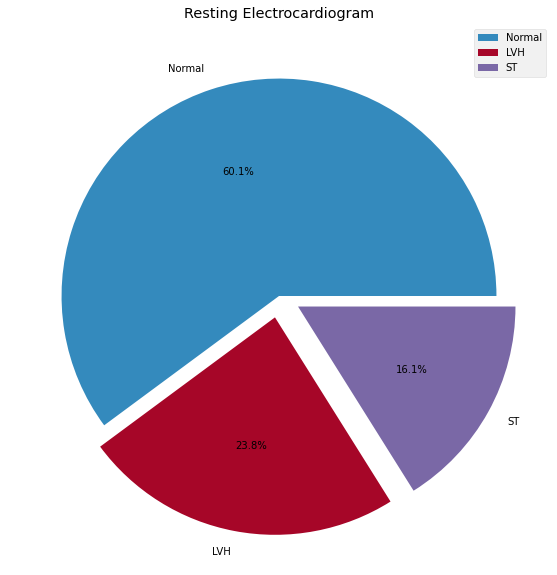

In [33]:
# Show resting electrocardiogram
plt.figure(figsize=(15, 10))
plt.pie(RestingECG, labels=['Normal', 'LVH', 'ST'],
                    autopct='%1.1f%%', shadow=False,
                    explode=[0.0, 0.1, 0.1])
plt.title('Resting Electrocardiogram')
plt.legend()
plt.show()

In [34]:
# Encode RestingECG column
df['RestingECG'] = LabelEncoderModel.fit_transform(df['RestingECG'])

In [35]:
df['RestingECG'].value_counts()

1    445
0    176
2    119
Name: RestingECG, dtype: int64

In [36]:
# MaxHR
df['MaxHR'].describe()

count    740.000000
mean     140.404054
std       24.452605
min       69.000000
25%      122.000000
50%      140.000000
75%      160.000000
max      202.000000
Name: MaxHR, dtype: float64

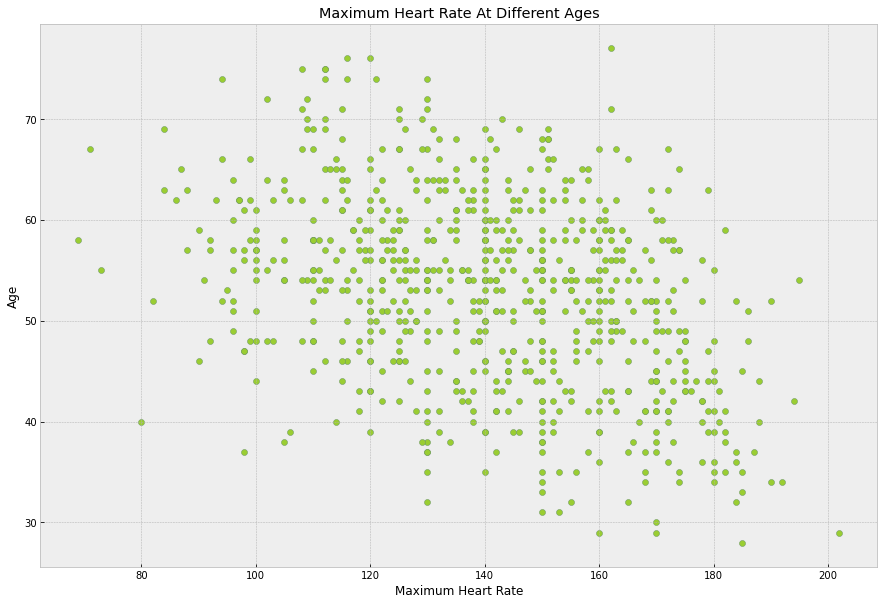

In [37]:
# Show Maximum Heart Rate At Different Ages
plt.figure(figsize=(15, 10))
plt.scatter(df['MaxHR'], df['Age'], color='yellowgreen', edgecolor="#6A9662")
plt.title('Maximum Heart Rate At Different Ages')
plt.xlabel('Maximum Heart Rate')
plt.ylabel('Age')
plt.show()

In [38]:
# ExerciseAngina
df['ExerciseAngina'].value_counts()

N    457
Y    283
Name: ExerciseAngina, dtype: int64

In [39]:
# Encode ExerciseAngina column
df['ExerciseAngina'] = LabelEncoderModel.fit_transform(df['ExerciseAngina'])

In [40]:
df['ExerciseAngina'].value_counts()

0    457
1    283
Name: ExerciseAngina, dtype: int64

In [41]:
# Oldpeak
df['Oldpeak'].describe()

count    740.000000
mean       0.900811
std        1.072450
min       -0.100000
25%        0.000000
50%        0.500000
75%        1.500000
max        6.200000
Name: Oldpeak, dtype: float64

In [42]:
# ST_Slope
df['ST_Slope'].value_counts()

Flat    350
Up      347
Down     43
Name: ST_Slope, dtype: int64

In [43]:
# Encode ST_Slope column
df['ST_Slope'] = LabelEncoderModel.fit_transform(df['ST_Slope'])

In [44]:
df['ST_Slope'].value_counts()

1    350
2    347
0     43
Name: ST_Slope, dtype: int64

# Machine Learning Model

In [45]:
# Divide data into dependent and independent
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [46]:
X.shape

(740, 11)

In [47]:
y.shape

(740,)

In [48]:
# Scaling Model
from sklearn.preprocessing import StandardScaler
StandardScalerModel = StandardScaler()
X = StandardScalerModel.fit_transform(X)

In [49]:
# Splitting Model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)

In [50]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression
LogisticRegressionModel = LogisticRegression(penalty='l2', C=1.0, solver='lbfgs', max_iter=100)
LogisticRegressionModel.fit(X_train, y_train)

LogisticRegression()

In [51]:
# Score of model
print('Score of train data = ', round(LogisticRegressionModel.score(X_train, y_train), 4))
print('Score of test data = ', round(LogisticRegressionModel.score(X_test, y_test), 4))

Score of train data =  0.853
Score of test data =  0.8784


In [52]:
# SVC Model
from sklearn.svm import SVC
SVCModel = SVC(C=1, kernel='rbf')
SVCModel.fit(X_train, y_train)

SVC(C=1)

In [53]:
# Score of model
print('Score of train data = ', round(SVCModel.score(X_train, y_train), 4))
print('Score of test data = ', round(SVCModel.score(X_test, y_test), 4))

Score of train data =  0.9122
Score of test data =  0.8784


In [54]:
# Decision Tree Classifier Model
from sklearn.tree import DecisionTreeClassifier
DecisionTreeClassifierModel = DecisionTreeClassifier()
DecisionTreeClassifierModel.fit(X_train, y_train)

DecisionTreeClassifier()

In [55]:
# Score of model
print('Score of train data = ', round(DecisionTreeClassifierModel.score(X_train, y_train), 4))
print('Score of test data = ', round(DecisionTreeClassifierModel.score(X_test, y_test), 4))

Score of train data =  1.0
Score of test data =  0.7703


**Oooh it has an overfit problem..**

In [56]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifierModel = RandomForestClassifier(n_estimators=10, criterion='entropy')
RandomForestClassifierModel.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [57]:
# Score of model
print('Score of train data = ', round(RandomForestClassifierModel.score(X_train, y_train), 4))
print('Score of test data = ', round(RandomForestClassifierModel.score(X_test, y_test), 4))

Score of train data =  0.9949
Score of test data =  0.8176


**It also has an overfit problem..**

In [58]:
# K-Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier
KNeighborsClassifierModel = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
KNeighborsClassifierModel.fit(X_train, y_train)

KNeighborsClassifier()

In [59]:
# Score of model
print('Score of train data = ', round(KNeighborsClassifierModel.score(X_train, y_train), 4))
print('Score of test data = ', round(KNeighborsClassifierModel.score(X_test, y_test), 4))

Score of train data =  0.8834
Score of test data =  0.8851


**It seems that K-Neighbors Classifier is the best one.
Number of observation is a little bit, so we can't have more than this accurecy..**

In [60]:
y_pred = KNeighborsClassifierModel.predict(X_test)

In [61]:
# Confusion Metric
from sklearn.metrics import confusion_matrix
ConfusionMetricModel = confusion_matrix(y_test, y_pred)

In [62]:
ConfusionMetricModel

array([[67,  6],
       [11, 64]])

there're 17 prediction will be wrong..

# THANK YOU..